In [19]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
#reading the data
data = pd.read_csv("boston_housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### **Feature Exploration**


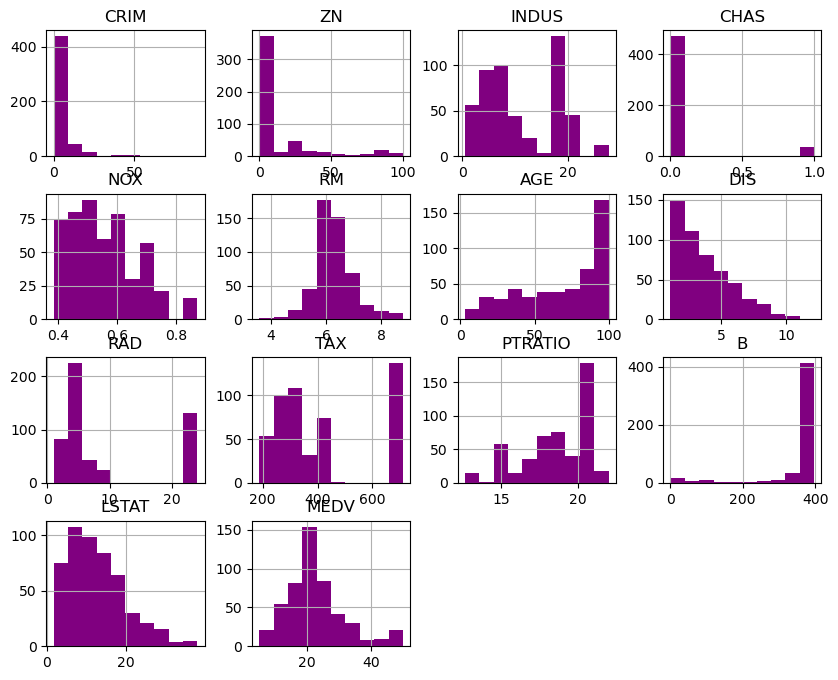

In [5]:

#distribution of values in each column
data.hist(figsize=(10, 8), color="purple");


Text(0.5, 1.0, 'Correlation between features')

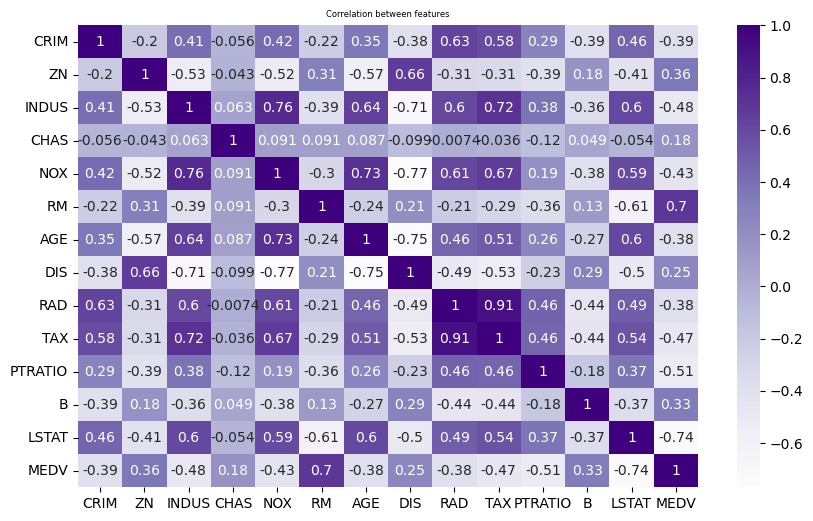

In [17]:
#checking the Pearson Correlation coefficient
plt.figure(figsize=(10,6));

sns.heatmap(data.corr(), annot = True, cmap = 'Purples')
plt.title('Correlation between features', fontsize = 6)

### **creating the model**

In [18]:
#defining the dependent and independent variables using important features
X = data.drop(['MEDV', 'RAD', 'CHAS','ZN', 'B'], axis = 1)
y = data.MEDV



In [20]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical labels as numbers
y_encoded = label_encoder.fit_transform(y)


In [21]:
#reshaping the data
a = np.array(X.iloc[10]).reshape(-1, 1)
a.shape
# (9, 1)

scaler = MinMaxScaler()
ascaled = scaler.fit_transform(a)
ascaled.reshape(1,-1)

array([[0.00000000e+00, 2.46001361e-02, 9.62464465e-04, 1.97960191e-02,
        3.02711211e-01, 1.96985209e-02, 1.00000000e+00, 4.81863235e-02,
        6.50795683e-02]])

In [22]:
#splitting into test and train
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
Model= xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, objective='reg:linear', random_state=0)


# Fit the model to the data
Model.fit(X_train, y_train)


[00:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [24]:
#Predicting with the train data
y_Model_pred = Model.predict(X_train)

In [25]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_Model_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_Model_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_Model_pred))


R^2: 0.970916153519657
MAE: 1.2184917506605093
MSE: 2.526612740302579


In [26]:
#predicting with the test data
t_Model_pred = Model.predict(X_test)

In [27]:
Model_score = metrics.r2_score(y_test, t_Model_pred)
print('R^2:', Model_score)
print('MAE:',metrics.mean_absolute_error(y_test, t_Model_pred))
print('MSE:',metrics.mean_squared_error(y_test, t_Model_pred))


R^2: 0.900775225623777
MAE: 2.0089876754611145
MSE: 7.2765280882379075


In [28]:
# Save the model to a file with .sav extension
filename = 'price_pred_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(Model, file)